# BEV PROJECT 

- [Wasserstien](https://github.com/AhmedYousriSobhi/W-Stereo-Disp) --> input: Left/Right image + Calib , output : Depthmap | Fork
- [PsuedoLidar_V2](https://github.com/mileyan/Pseudo_Lidar_V2) --> input Depthmap , output : points clouds + Planes.
- [Avod](https://github.com/AhmedYousriSobhi/avod) --> input: Images + points clouds + planes + calib , output : labels.
- [Kitti Visiualize](https://github.com/kuixu/kitti_object_vis) --> input: labels converted + image_2 + calib+ point clouds , output: BEV


covert from avod format to kitti :
https://github.com/kujason/avod/wiki/Data-Formats

References:

[PSMNET](https://github.com/JiaRenChang/PSMNet)
[Avod PAPER](https://arxiv.org/abs/1712.02294)

In [1]:
!pwd

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


In [2]:
!git clone https://github.com/AhmedYousriSobhi/W-Stereo-Disp.git

Cloning into 'W-Stereo-Disp'...
remote: Enumerating objects: 301, done.
remote: Counting objects: 100% (301/301), done.
remote: Compressing objects: 100% (215/215), done.
remote: Total 301 (delta 99), reused 243 (delta 64), pack-reused 0
Receiving objects: 100% (301/301), 35.82 MiB | 3.41 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [ ]:
# install awscli for python
!pip install awscli -qq 

     |████████████████████████████████| 3.8 MB 5.3 MB/s 
     |████████████████████████████████| 547 kB 52.0 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 8.5 MB 38.3 MB/s 
     |████████████████████████████████| 138 kB 50.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
!chmod +x ./W-Stereo-Disp/scripts/download_kitti.sh
! ./W-Stereo-Disp/scripts/download_kitti.sh

In [66]:
!pip3 install -r W-Stereo-Disp/src/requirements.txt -qq

  ERROR: Command errored out with exit status 1:
   command: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-tg5ytj6d/pillow/setup.py'"'"'; __file__='"'"'/tmp/pip-install-tg5ytj6d/pillow/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-8oyqamht
       cwd: /tmp/pip-install-tg5ytj6d/pillow/
  Complete output (172 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.8
  creating build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/PaletteFile.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/XVThumbImagePlugin.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/ImageFont.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/ImageStat.py -> build/lib.linux-x86_64-3.8/PIL
  copying src/PIL/PalmImagePlugin.py -> build/lib.l

In [5]:
%cd W-Stereo-Disp/
!mkdir checkpoints
%cd checkpoints/

# To Download checkpoint.pth.tar, model_best.pth.tar files
!gdown --id 1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77  # checkpoint.pth.tar
!gdown --id 10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o  # model_best.pth.tar
%cd ../..

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints
Downloading...
From: https://drive.google.com/uc?id=1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints/checkpoint.pth.tar
100%|██████████████████████████████████████| 64.0M/64.0M [00:41<00:00, 1.54MB/s]
Downloading...
From: https://drive.google.com/uc?id=10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/W-Stereo-Disp/checkpoints/model_best.pth.tar
100%|██████████████████████████████████████| 64.0M/64.0M [00:20<00:00, 3.10MB/s]
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


In [23]:
!python3 'W-Stereo-Disp/src/main_depth.py' -c 'W-Stereo-Disp/src/configs/kitti_w1.config' \
    --bval 2 \
    --resume 'W-Stereo-Disp/checkpoints/checkpoint.pth.tar' --pretrain 'W-Stereo-Disp/checkpoints/model_best.pth.tar' --datapath  'KITTI/testing' \
    --data_list='KITTI/val.txt' --generate_depth_map

[2021-12-28 13:45:34 main_depth.py:165] INFO     api_key: 
[2021-12-28 13:45:34 main_depth.py:165] INFO     arch: stackhourglass_volume
[2021-12-28 13:45:34 main_depth.py:165] INFO     btrain: 12
[2021-12-28 13:45:34 main_depth.py:165] INFO     bval: 2
[2021-12-28 13:45:34 main_depth.py:165] INFO     calib_value: 1017
[2021-12-28 13:45:34 main_depth.py:165] INFO     checkpoint_interval: -1
[2021-12-28 13:45:34 main_depth.py:165] INFO     config: W-Stereo-Disp/src/configs/kitti_w1.config
[2021-12-28 13:45:34 main_depth.py:165] INFO     data_list: KITTI/val.txt
[2021-12-28 13:45:34 main_depth.py:165] INFO     data_tag: None
[2021-12-28 13:45:34 main_depth.py:165] INFO     data_type: depth
[2021-12-28 13:45:34 main_depth.py:165] INFO     datapath: KITTI/testing
[2021-12-28 13:45:34 main_depth.py:165] INFO     dataset: kitti
[2021-12-28 13:45:34 main_depth.py:165] INFO     depth_wise_loss: False
[2021-12-28 13:45:34 main_depth.py:165] INFO     down: 2
[2021-12-28 13:45:34 main_depth.py:165

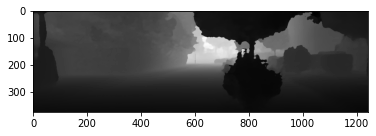

In [24]:
import numpy as np
img_array = np.load('KITTI/testing/depth_maps/000000.npy')

from matplotlib import pyplot as plt

plt.imshow(img_array,cmap='gray')
plt.show()

# Pseudo Lidar V2
## converting depth to Points Cloud

In [19]:
!git clone https://github.com/mileyan/Pseudo_Lidar_V2

Cloning into 'Pseudo_Lidar_V2'...
remote: Enumerating objects: 114, done.
remote: Total 114 (delta 0), reused 0 (delta 0), pack-reused 114
Receiving objects: 100% (114/114), 2.89 MiB | 2.36 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [25]:
# Convert depth maps to Pseudo-Lidar Point Clouds
!python3 ./Pseudo_Lidar_V2/src/preprocess/generate_lidar_from_depth.py --calib_dir  "KITTI/testing/calib" \
    --depth_dir "KITTI/testing/depth_maps/"  \
    --save_dir  "KITTI/testing/velodyne/"

Finish Depth 000000
Finish Depth 000001
Finish Depth 000002
Finish Depth 000003
Finish Depth 000004
Finish Depth 000005
Finish Depth 000006
Finish Depth 000007
Finish Depth 000008
Finish Depth 000009
Finish Depth 000010
Finish Depth 000011
Finish Depth 000012
Finish Depth 000013
Finish Depth 000014


## Ground Planes

In [26]:
!python3 ./Pseudo_Lidar_V2/src/preprocess/kitti_process_RANSAC.py --calib_dir  "KITTI/testing/calib" \
    --lidar_dir "KITTI/testing/velodyne" \
    --planes_dir  "KITTI/testing/planes"

-------------  000000
[ 0.00585103 -0.99996674 -0.00568274]
1.6840078379390446
-------------  000001
[-0.00394178 -0.9999626  -0.00769768]
1.6535719702138254
-------------  000002
[-0.03323467 -0.99944083  0.00367105]
1.687848971390153
-------------  000003
[-0.01484718 -0.99988398 -0.00340395]
1.721746783446253
-------------  000004
[-0.02054222 -0.99977786 -0.00471626]
1.6927577697771061
-------------  000005
[-0.02886665 -0.99951464 -0.0117136 ]
1.7040313239317142
-------------  000006
[-0.04014472 -0.99919108 -0.00236252]
1.664875398483823
-------------  000007
[-0.01169277 -0.99991867  0.00509253]
1.6771612507127795
-------------  000008
[-0.03313016 -0.99943408  0.0058236 ]
1.535174920715829
-------------  000009
[-0.00879233 -0.99989024 -0.01192451]
1.5929895444029976
-------------  000010
[-0.02024268 -0.99978817 -0.00372083]
1.6692521936280165
-------------  000011
[-0.01511114 -0.9998786  -0.00379984]
1.6865393077671675
-------------  000012
[-0.01140193 -0.9999306  -0.002965

# Avod

In [29]:
!git clone https://github.com/AhmedYousriSobhi/avod --recurse-submodules

Cloning into 'avod'...
remote: Enumerating objects: 356, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 356 (delta 14), reused 27 (delta 8), pack-reused 257
Receiving objects: 100% (356/356), 24.08 MiB | 3.35 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Submodule 'wavedata' (https://github.com/kujason/wavedata.git) registered for path 'wavedata'
Cloning into '/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/wavedata'...
remote: Enumerating objects: 39, done.        
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39        
Submodule path 'wavedata': checked out 'c4b5aabd9eb3b74fad777349f75161032d3460fa'


In [33]:
!pip3 install -r ./avod/requirements.txt

In [34]:
!pip3 install -r ./avod/wavedata/requirements.txt

In [51]:
!export PYTHONPATH=$PYTHONPATH:"media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod"
!export PYTHONPATH=$PYTHONPATH:"media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/wavedata"

In [58]:
!source .~/bash_profile

/bin/bash: .~/home/bash_profile: No such file or directory


## Note:
- Remove CMakeCashe.txt from YOUR_PATH/avod/wavedata/wavedata/tools/core

In [37]:
!chmod +x ./avod/scripts/install/build_integral_image_lib.bash
!sh ./avod/scripts/install/build_integral_image_lib.bash

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/wavedata/wavedata/tools/core/lib
Scanning dependencies of target integral_images_3d
[ 50%] Building CXX object CMakeFiles/integral_images_3d.dir/integral_images_3d.cpp.o
[100%] Linking CXX shared library libintegral_images_3d.so
[100

In [41]:
!sh ./avod/avod/protos/run_protoc.sh

Compiling protos in /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/protos
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/kitti_dataset.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/kitti_utils.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/mini_batch.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:562] No syntax specified for the proto file: avod/protos/layers.proto. Pl

In [ ]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.6 MB 55 kB/s 
     |████████████████████████████████| 367 kB 48.5 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 3.2 MB 30.0 MB/s 
     |████████████████████████████████| 1.1 MB 34.5 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.2.0
    Uninstalling protobuf-3.2.0:
      Successfully uninstalled protobuf-3.2.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
ERROR

# Steps:
File: avod/avod/data/outputs/pyramid_cars_with_aug_example.config 
- in Line 136 - dataset_dir =  change your dataset location.
- in Line 137 - data_split = name of split txt file.
- in Line 139 - data_split_dir = "" -- Empty string.

File: avod/avod/datasets/kitti/kitti_dataset.py - in Line 76
- possible_splits = ['val']
- import sys
- sys.path.insert(1, 'PATH_TO_LOCATION/avod/wavedata')

File: avod/avod/core/evaluator.py - line 373:
- checkpoint_to_restore = 'PATH_TO_LOCATION/avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints/pyramid_cars_with_aug_example_scratch_300_val-00120000'

In your dataset dir location, should have: 
- planes folder : output from pseudo-lidar-V2.
- velodyne folder : output from pseudo-lidar-V2.

In file ...... CHange output path.

Dataset testing used in wasserstien, training (testing) used in avod --> change.

In [47]:
# Checkpoints download
%mkdir avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
%cd avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
!gdown --id 1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
!unzip avod.zip
%rm -r avod.zip
%cd ../../../../..

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/data/outputs/checkpoints
Downloading...
From: https://drive.google.com/uc?id=1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
To: /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/data/outputs/checkpoints/avod.zip
100%|████████████████████████████████████████| 248M/248M [01:10<00:00, 3.50MB/s]
Archive:  avod.zip
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.data-00000-of-00001  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.index  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.meta  
/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


In [80]:
!python3 avod/avod/experiments/run_inference.py --checkpoint_name='pyramid_cars_with_aug_example' --data_split='val' --ckpt_indices=120 --device='1'

2021-12-28 15:02:39.722753: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 15:02:39.747357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 15:02:39.747660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 15:02:39.759102: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Step 120000: 2 / 15, Inference on sample 000001
[[[ 72  53  40]
  [ 44  44  44]
  [ 43  42  47]
  ...
  [ 94 240 195]
  [132 255 213]
  [127 255 251]]

 [[ 64  63  39]
  [ 43  51  40]
  [ 39  48  45]
  ...
  [100 232 226]
  [121 254 238]
  [113 255 255]]

 [[ 66  83  93]
  [ 36  57  94]
  [ 18  46  61]
  ...
  [ 89 193 202]
  [ 84 231 206]
  [ 93 255 212]]

 ...

 [[104 120 124]
  [ 98 121 135]
  [ 98 128 146]
  ...
  [ 20  17   9]
  [ 20  19  12]
  [ 19  17  14]]

 [[161 166 139]
  [164 169 140]
  [170 168 148]
  ...
  [ 20  17   9]
  [ 22  21  10]
  [ 22  20  12]]

 [[168 219 211]
  [165 225 221]
  [173 222 236]
  ...
  [ 19  14  20]
  [ 23  17  21]
  [ 23  19  24]]]
Step 120000: 3 / 15, Inference on sample 000002
[[[157 154 170]
  [158 150 168]
  [157 153 161]
  ...
  [ 17  16  18]
  [ 24  17  21]
  [ 23  21  24]]

 [[153 165 171]
  [150 159 171]
  [148 156 166]
  ...
  [ 19  19  22]
  [ 27  22  22]
  [ 26  23  22]]

 [[154 162 180]
  [149 164 181]
  [145 163 169]
  ...
  [ 28  23  

Step 120000: 15 / 15, Inference on sample 000014
2021-12-28 15:02:58.610608: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.93GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-12-28 15:02:58.610667: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.93GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
Feed dict time:
Min:  0.4097
Max:  0.61221
Mean:  0.48631
Median:  0.49674
Inference time:
Min:  0.28324
Max:  4.4573
Mean:  0.63157
Median:  0.34908
Step 120000: Finished evaluation, results saved to /media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/avod/avod/data/outputs/pyramid_cars_with_aug_examp

In [ ]:
# !python3 avod/demos/show_predictions_2d.py

In [ ]:
# !python3 avod/demos/kitti_bev_vis.py

## Changing avod label format to KITTI label Format

In [13]:
!python3 to_kitti_format.py --avod_label_path "avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000" \
        --save_path KITTI/testing/label_2

Namespace(avod_label_path='avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000', save_path='KITTI/testing/label_2', threshold=0.02)
Opening FIle:  000000.txt
Opening FIle:  000001.txt
Opening FIle:  000002.txt
Opening FIle:  000003.txt
Opening FIle:  000004.txt
Opening FIle:  000005.txt
Opening FIle:  000006.txt
Opening FIle:  000007.txt
Opening FIle:  000008.txt
Opening FIle:  000009.txt
Opening FIle:  000010.txt
Opening FIle:  000011.txt
Opening FIle:  000012.txt
Opening FIle:  000013.txt
Opening FIle:  000014.txt
COMPLETED


# Kitti Detect and Vis

In [109]:
!git clone https://github.com/AhmedYousriSobhi/kitti_object_vis.git

Cloning into 'kitti_object_vis'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 272 (delta 5), reused 0 (delta 0), pack-reused 259
Receiving objects: 100% (272/272), 11.24 MiB | 3.04 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [1]:
!pwd

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project


In [14]:
%cd kitti_object_vis/

/media/yousri/Kingdom/Workspace/ITi/WorkSpace/Python Notebooks/Jupyter/Tekomoro/BEV Project/kitti_object_vis


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [4]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

Notebook initialized with ipy backend.


In [21]:
dataset = kitti_object('../KITTI', 'testing')

data_idx = 5
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

../KITTI testing
../KITTI/testing/velodyne/000005.bin
('All point num: ', 307080)
('FOV point num: ', (307070, 4))
pc_velo (307070, 4)
==================== (307070, 4)
box3d_pts_3d_velo:
[[ 9.14487243 -2.01813003 -1.54597338]
 [ 9.19467722 -3.53148162 -1.56144375]
 [ 6.09219615 -3.63324261 -1.59494168]
 [ 6.04239135 -2.11989102 -1.5794713 ]
 [ 9.12998693 -2.03318069 -0.12160057]
 [ 9.17979172 -3.54653228 -0.13707095]
 [ 6.07731065 -3.64829328 -0.17056887]
 [ 6.02750586 -2.13494169 -0.1550985 ]]
box3d_pts_3d_velo:
[[13.67003353 -1.97748129 -1.48565201]
 [13.69774718 -3.55299259 -1.50201006]
 [10.14731003 -3.61505365 -1.53976988]
 [10.11959637 -2.03954235 -1.52341183]
 [13.65495848 -1.99272361 -0.0431412 ]
 [13.68267213 -3.56823491 -0.05949925]
 [10.13223498 -3.63029597 -0.09725908]
 [10.10452133 -2.05478467 -0.08090103]]
box3d_pts_3d_velo:
[[ 1.84076714e+01 -1.86846985e+00 -1.42529810e+00]
 [ 1.84405457e+01 -3.46964658e+00 -1.44187342e+00]
 [ 1.46353451e+01 -3.54735221e+00 -1.48246097e+

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

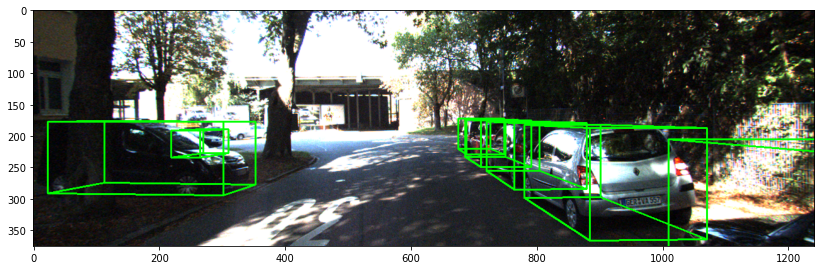

In [22]:
_, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

top_image: (500, 300, 3)


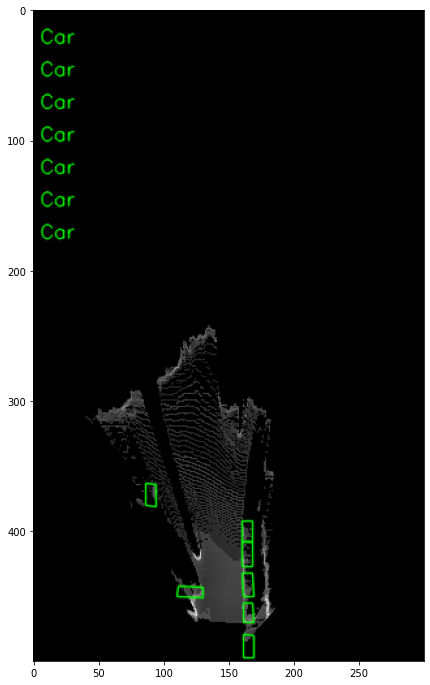

In [23]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()